In [5]:
pip install requests beautifulsoup4 pandas

In [20]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the Lok Sabha election results page
results_url = 'https://results.eci.gov.in/PcResultGenJune2024/index.htm'

# Send a request to the website
response_from_website = requests.get(results_url)
soup_from_website = BeautifulSoup(response_from_website.content, 'html.parser')

# Find the table containing election results
tables_of_results = soup_from_website.find_all('table')

# Example to extract data from the first table
data_from_results = []
for table in tables_of_results:
    rows_results = table.find_all('tr')
    for row in rows_results:
        cols_results = row.find_all('td')
        cols_results = [col.text.strip() for col in cols_results]
        data_from_results.append(cols_results)

# Convert the data into a DataFrame
results_columns = ['Party', 'Won', 'Leading', 'Total']
results_df = pd.DataFrame(data_from_results[1:], columns=results_columns)

# Save the DataFrame to a CSV file
results_df.to_csv('election_results.csv', index=False)

print("Data scraping completed and saved to election_results.csv")


Data scraping completed and saved to election_results.csv


In [21]:
import pandas as pd

# Load data into a DataFrame
elections_df = pd.read_csv('election_results.csv')

# Handling missing values (if any)
elections_df.fillna(0, inplace=True)

# Convert numerical columns to integers
elections_df['Won'] = elections_df['Won'].astype(int)
elections_df['Leading'] = elections_df['Leading'].astype(int)
elections_df['Total'] = elections_df['Total'].astype(int)

print("Data cleaning completed.")


Data cleaning completed.


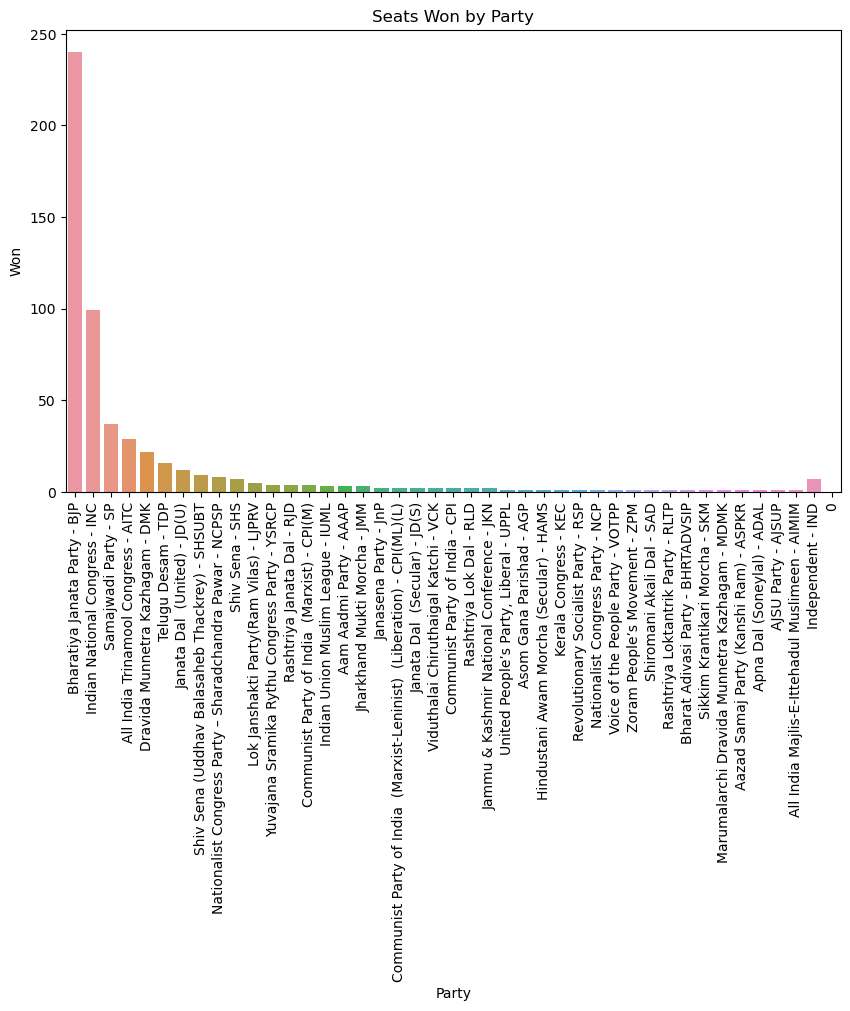

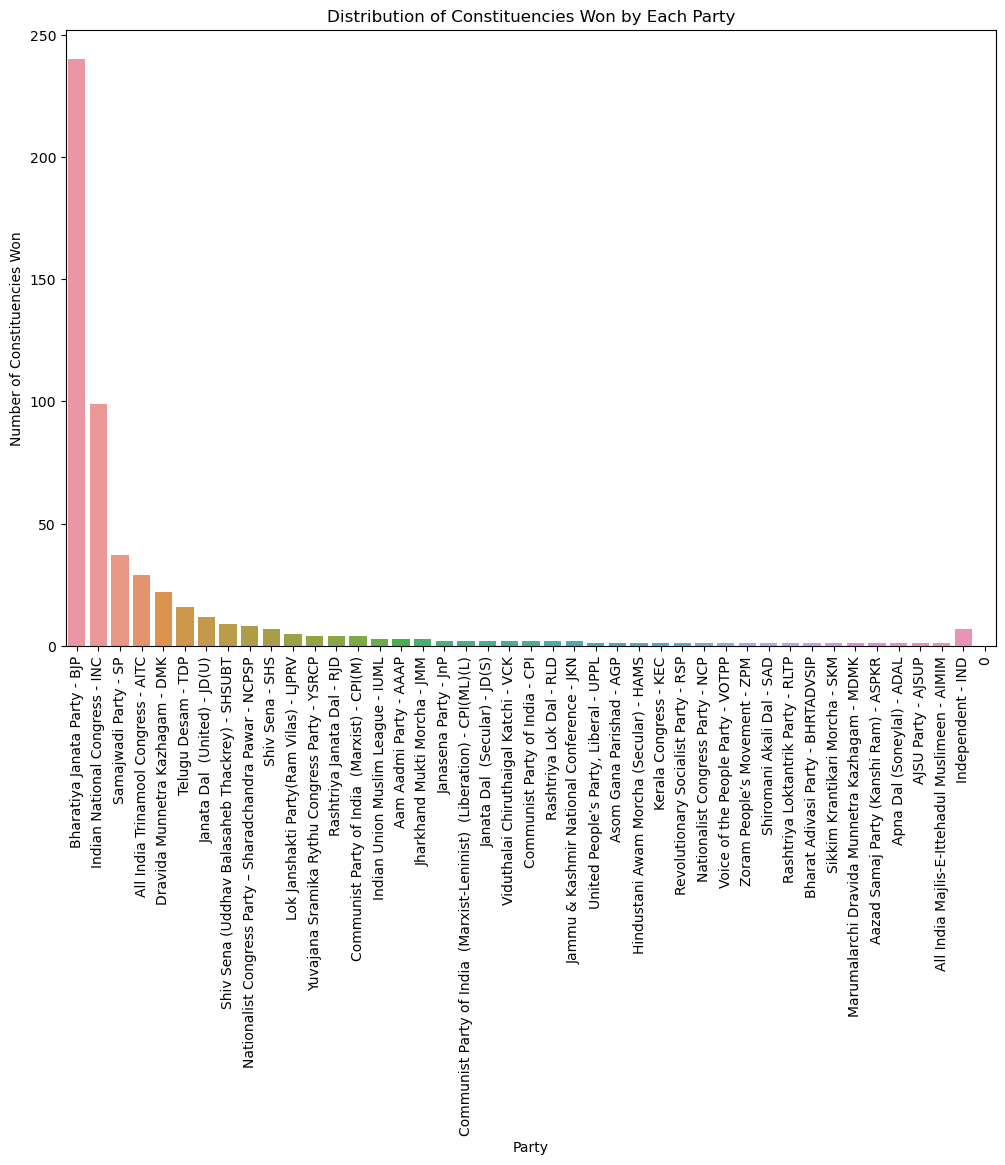

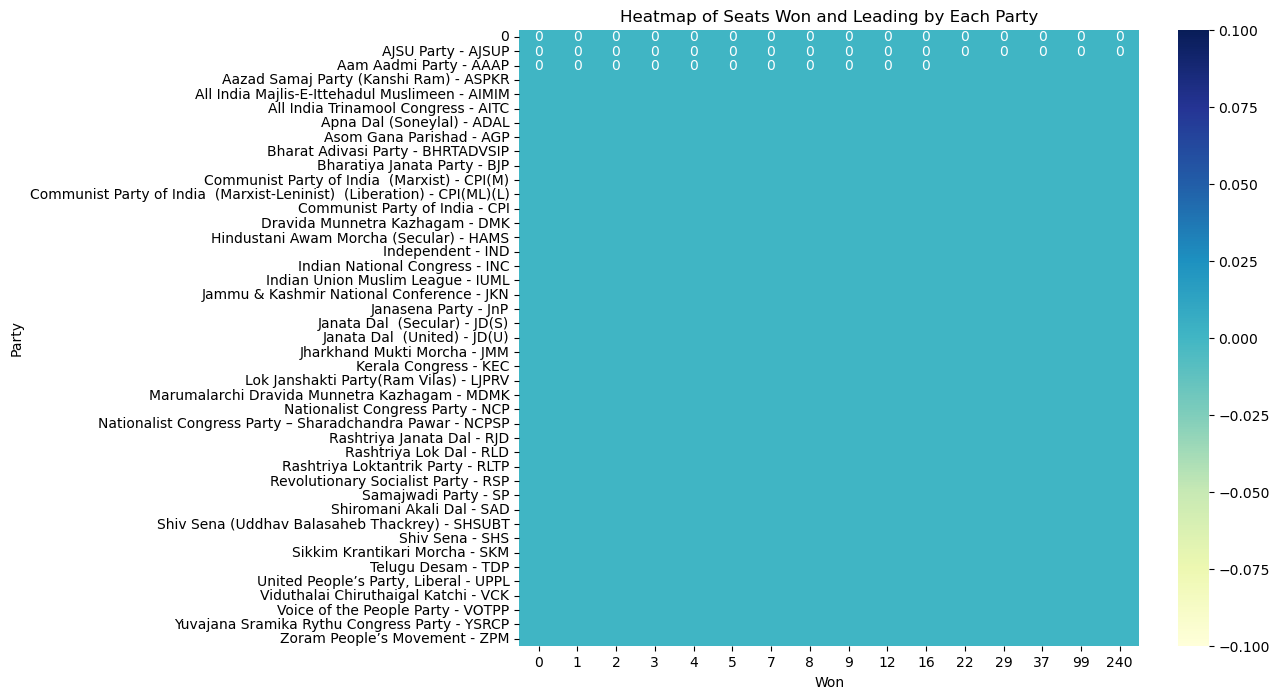

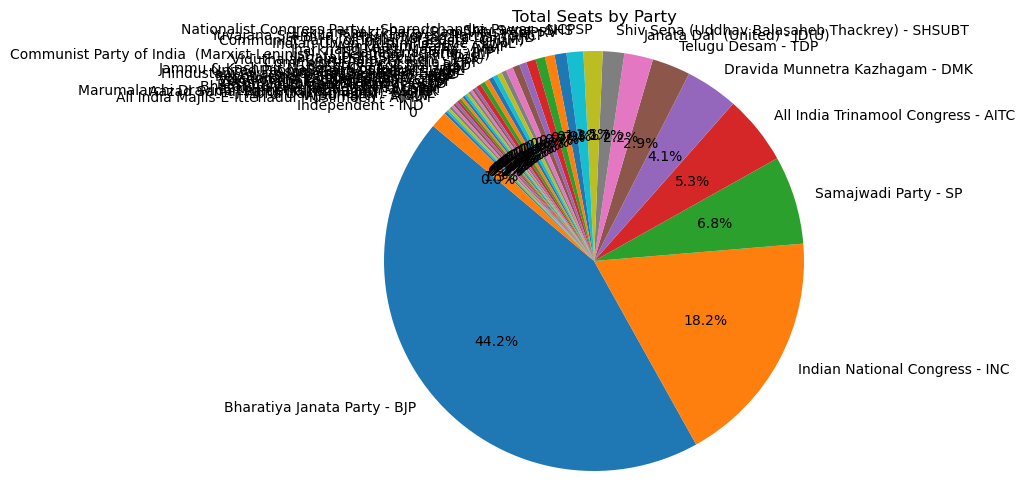

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


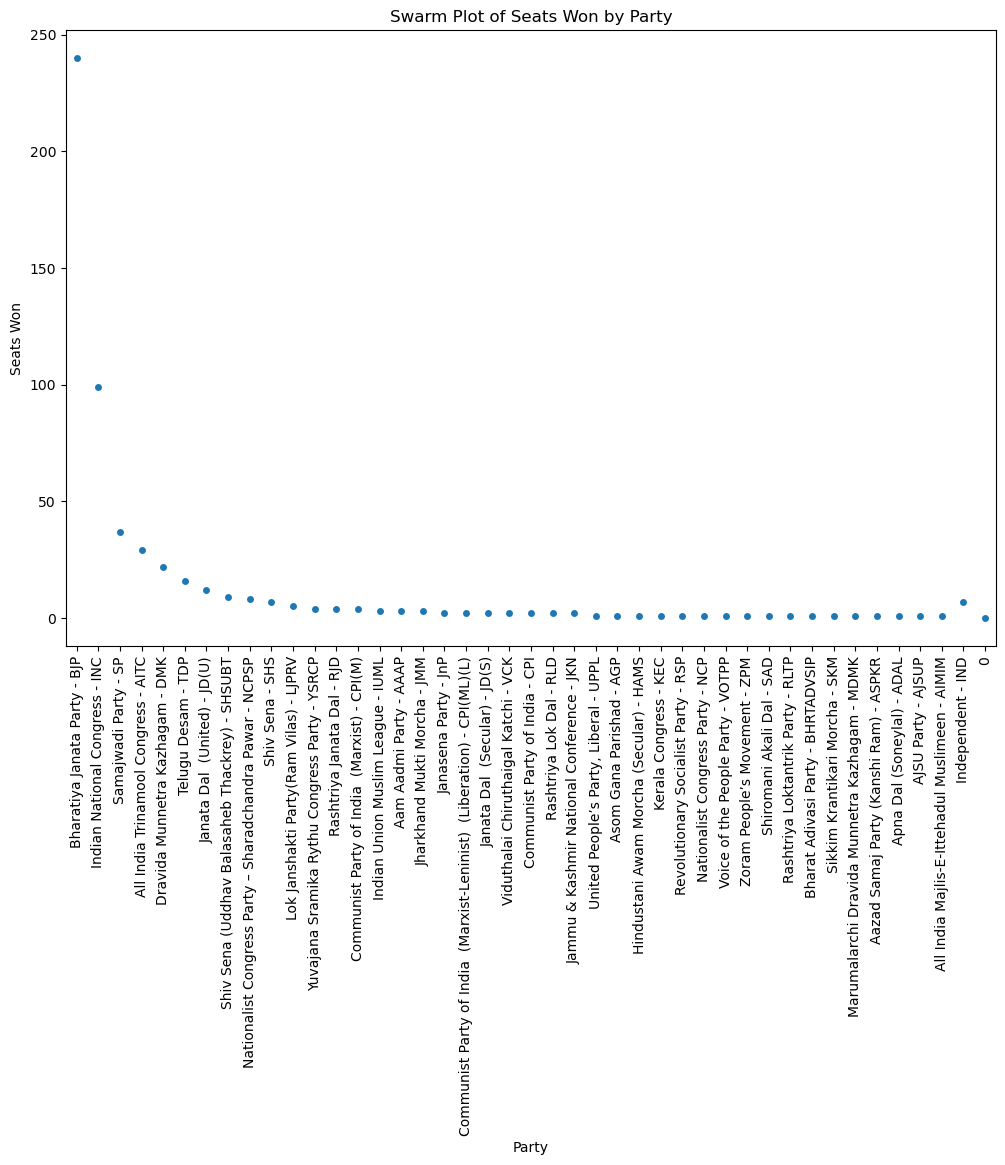

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


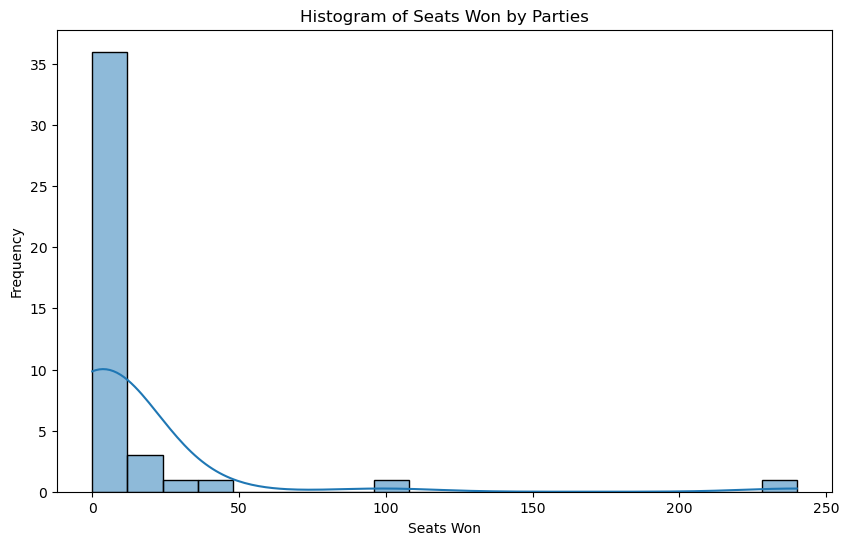

Top 10 parties by seats won:
                                                Party  Won  Leading  Total
0                        Bharatiya Janata Party - BJP  240        0    240
1                      Indian National Congress - INC   99        0     99
2                                Samajwadi Party - SP   37        0     37
3                 All India Trinamool Congress - AITC   29        0     29
4                     Dravida Munnetra Kazhagam - DMK   22        0     22
5                                  Telugu Desam - TDP   16        0     16
6                        Janata Dal  (United) - JD(U)   12        0     12
7      Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT    9        0      9
8   Nationalist Congress Party – Sharadchandra Paw...    8        0      8
41                                  Independent - IND    7        0      7


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
summary_stats_of_elections = elections_df.describe()

# Visualization: Bar chart for seats won by each party
plt.figure(figsize=(10, 6))
sns.barplot(x='Party', y='Won', data=elections_df)
plt.title('Seats Won by Party')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Party', y='Won', data=elections_df)
plt.title('Distribution of Constituencies Won by Each Party')
plt.xlabel('Party')
plt.ylabel('Number of Constituencies Won')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 8))
heatmap_data = elections_df.pivot_table(index='Party', columns='Won', values='Leading', fill_value=0)
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")
plt.title('Heatmap of Seats Won and Leading by Each Party')
plt.show()

# Visualization: Pie chart for the total number of seats
plt.figure(figsize=(10, 6))
plt.pie(elections_df['Total'], labels=elections_df['Party'], autopct='%1.1f%%', startangle=140)
plt.title('Total Seats by Party')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

plt.figure(figsize=(12, 8))
sns.swarmplot(x='Party', y='Won', data=elections_df)
plt.title('Swarm Plot of Seats Won by Party')
plt.xlabel('Party')
plt.ylabel('Seats Won')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(elections_df['Won'], bins=20, kde=True)
plt.title('Histogram of Seats Won by Parties')
plt.xlabel('Seats Won')
plt.ylabel('Frequency')
plt.show()

# Generating insights
top_parties_that_won = elections_df.sort_values(by='Won', ascending=False).head(10)
print("Top 10 parties by seats won:")
print(top_parties_that_won)
